In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Question: What is the rank of the following matrix?
# $$Z = \begin{bmatrix}1&2&3\\4&5&6\\7&8&9\end{bmatrix}$$

In [ ]:
np.linalg.matrix_rank?

## Question: Consider a matrix $\mathbf{Y}$ which is the first two columns of $\mathbf{Z}$,
## Is there a vector $\mathbf{x}$ such that
## $$\begin{bmatrix}1&2\\4&5\\7&8\end{bmatrix}\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix} = \begin{bmatrix}3\\6\\9\end{bmatrix}$$
## ?
## Or

In [6]:
Z = np.arange(1, 10).reshape(3, 3)
Y = Z[:, :2]
W = Z[:, -1]
print(Z)
print(Y)
print(W)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2]
 [4 5]
 [7 8]]
[3 6 9]


In [8]:
np.linalg.solve(Y, W)

LinAlgError: Last 2 dimensions of the array must be square

## Question: What went wrong?
---
## Exercise: Find $\mathbf{x}$ based only on the first two rows of $\mathbf{Z}$

In [ ]:
# enter code here.

## Find the ranks of the following matrices:

In [ ]:
A = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

In [ ]:
# enter code here

In [9]:
A = np.array([
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 0]
])

In [10]:
# enter code here
np.linalg.matrix_rank(A)

2

In [13]:
A = np.array([
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 0.000001]
])

In [14]:
# enter code here

3

## Problem: Matrix Rank is exact, not approximate.
----
# Low Rank Approximations
## Consider the following dataset:

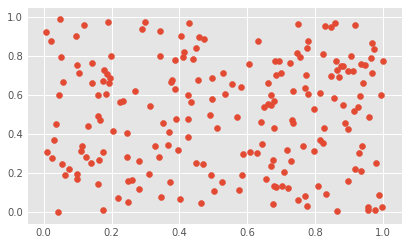

In [43]:
x, y = np.random.rand(200, 2).T
plt.scatter(x, y)

In [24]:
np.linalg.matrix_rank(X)

2

### Draw an ellipse with center at the origin, and major and minor axes as 1 and 0.5 respectively.

In [42]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler

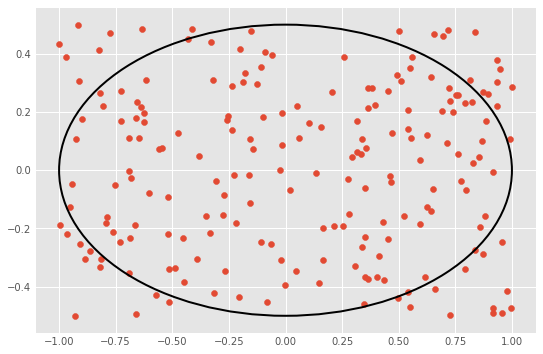

In [49]:
A, B = 1, 0.5
el = Ellipse((0, 0), 2 * A, 2 * B, fill=False, linewidth=2, edgecolor='k')

x = MinMaxScaler((-A, A)).fit_transform(x.reshape(-1, 1)).ravel()
y = MinMaxScaler((-B, B)).fit_transform(y.reshape(-1, 1)).ravel()

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x , y)

ax.add_patch(el)

### Filter the points inside the ellipse

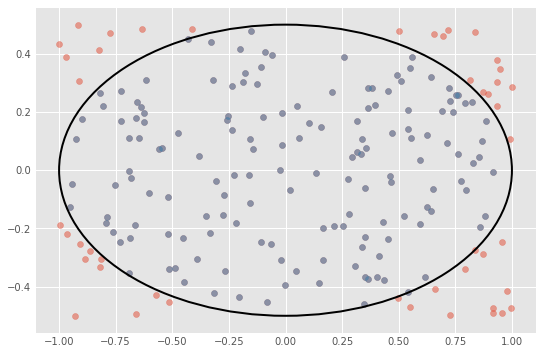

In [51]:
pts_out = (x ** 2) / (A ** 2) + (y ** 2) / (B ** 2) < 1
x_in = x[pts_out]
y_in = y[pts_out]

el = Ellipse((0, 0), 2 * A, 2 * B, fill=False, linewidth=2, edgecolor='k')
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, alpha=0.5)
ax.scatter(x_in, y_in, alpha=0.5)
ax.add_patch(el)

In [52]:
XNEW = np.c_[x_in, y_in]

## Covariance Matrix of $\mathbf{X_{new}}$

In [63]:
C = np.cov(XNEW.T)
print(C)

[[0.26863867 0.00573415]
 [0.00573415 0.05727599]]


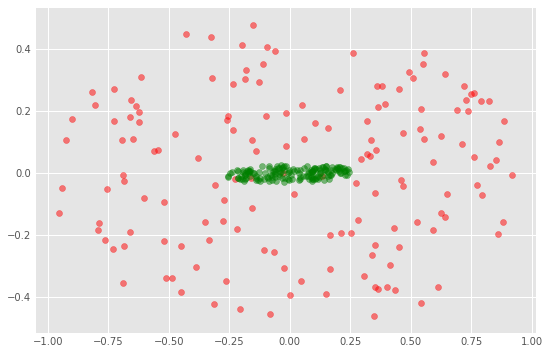

In [65]:
xdiag = np.dot(XNEW, C)
plt.figure(figsize=(8, 6))
plt.scatter(*XNEW.T, alpha=0.5, c='r')
plt.scatter(*xdiag.T, alpha=0.5, c='g')

### What just happened?
### Key ideas - diagonalization & change of basis
### Introducing Eigenvalues and Eigenvectors

In [66]:
w, v = np.linalg.eig(C)

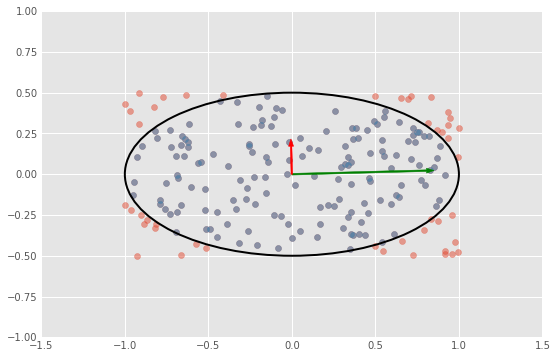

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x, y, alpha=0.5)
ax.scatter(x_in, y_in, alpha=0.5)

el = Ellipse((0, 0), 2 * A, 2 * B, fill=False, linewidth=2, edgecolor='k')

ax.add_patch(el)
ax.axis([-1.5, 1.5, -1, 1])


(e1dx, e1dy), (e2dx, e2dy) = (3 * w * v).T
ax.arrow(0, 0, e1dx, e1dy, color='g', width=0.01)
ax.arrow(0, 0, e2dx, e2dy, color='r', width=0.01)

# Exercise: Plot the top 2 principal components of the Iris dataset (given below)

In [75]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# enter code here